In [1]:
import aocd
from aocd.models import Puzzle
day = 20
year = 2021
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter
from scipy.signal import convolve2d
from functools import partial

In [3]:
data = puzzle.input_data.splitlines()
len(data), data[:5], data[-5:]

(102,
 ['#######..#.##.##...##.#.#..###..##....######.#.#..#..######.#.#..#####..##.##...#..##........#.#.#...##..##.#####..####.#####..####.#.##.#.#.#.##...##.##.#....###..#...###.#.##..##....##.##.#####..#...#..#....##..##.......##.##....###...#.##...######.##.#######.#.#.#.##.#.#..##.##...##.#.##.#####.#####.###.#....###..###.##.....###..#.##.########..#.#..####..#.###...##...##....##.#.#####..#...##.#..###...##......#.....#.##....##.###..#####..##.###....#..##..##.##.#######.#.##.##.#.####..###.###..#.####..##..',
  '',
  '.##..#.#....#..#.###..#..#..###..#.#.#.##.#..##.##...#.##.#.#.###.#.##...#.#####..#.#...#..#.#.###.#',
  '.#..#####....##....#....#......###.##.#.#.#.##...##...##.##.##.###..#.####.######.#.##.#.....###..#.',
  '###..#.##.##.##.....##..#...#..###...#####.##.#...#.#.#.....#.#..##...##..##.#..##.#.#######.....##.'],
 ['#.##.###.#####.####.#.#.........#...#....###...#.#..#.#...###...##..#...#..#.#.#..#####..#.####.##.#',
  '...##.###.###..###.#.####.##.#....#.....#.

In [16]:
test_data = """..#.#..#####.#.#.#.###.##.....###.##.#..###.####..#####..#....#..#..##..###..######.###...####..#..#####..##..#.#####...##.#.#..#.##..#.#......#.###.######.###.####...#.##.##..#..#..#####.....#.#....###..#.##......#.....#..#..#..##..#...##.######.####.####.#.#...#.......#..#.#.#...####.##.#......#..#...##.#.##..#...##.#.##..###.#......#.#.......#.#.#.####.###.##...#.....####.#..#..#.##.#....##..#.####....##...##..#...#......#.#.......#.......##..####..#...#.#.#...##..#.#..###..#####........#..####......#..#

#..#.
#....
##..#
..#..
..###""".splitlines()

In [164]:
test_data2 = """#.#.#.#.#......#.#.#.#.##..#.##.##..#..##...#.#.#.#...##.##.##.###....#..#...#.#..###.#...#..##.#.###..#..####.###...#.#.#..##..##.##..##..###..#....#.#....#####.#...###...#.#....###...#..##.##..#..#.##..###..#.##.###..#.####...#.##.....#.###...#.##.##.#.#######...#.###..##..##..#.#.#.#####...#....#.....##.#.#...##.######....#..#......#.#.#.#.##...######.#.#####..#####..#.#.#.#.###.#.#....#..##..#..#.#.#..##....##..#.#.......##...#..####.####.#.#..#.###..#...#......###...#...#.##.#.####..#.#....###.####..#.

.#.#.########.##.#...##.####...##..#####...##..#.#.###..#...#.#.##.#.....#..#.###...##..#.###.###.##
.######.#..##.##...#.#.####.#.###..#..#.##.##...##.#...##..#.######...##....###...###..#.#.##.##....
..######.#.#.##.#.##.###.##..#####.####..#......#.##.###.#.#.##...#####.###..###...#..#..#..##.#....
###..##.#...##.#.#...######..#.#..##..##.#.##.#.#.#.##.#..####.#.#.##......#.#.#...#.##..#.###.###.#
#.#.#...#..####...#.#..#.##.####.#..#..###########...#....#.#.##.###..#####.#.#.#.###...##..####.#..
#.#..#.##.#..#..#..#....##.#.#.#...#..###.#.##.##.#.#.##.##..#.#.####.#######....###..#.######.#.#..
......###..#..##.####.##.##..#..#.##.##.#..#...###...####.#..#...###.##.#.#####.....#...#..#...####.
####..##.###.#...##..#.##....#..##.##..####.#.#.####.##..#..#.....#.###......#.#....#.#.....#.#..#..
.###.####.#..###..#.#.#.#...##.####.#..#..##....#...###.#.#....#..#######.###.....#.#.#.##...##.#..#
##.#......#.##.###.#.##..##.##..#######.###..##..#.#####..#.#..#.#.#..#..##..##.##...#####.#.##.####
.#.###....##.......#######..#.########..#..##..#.####.###..#..###.##..#...####.#.#..#.##.######.#..#
..###.#.##..##.#....#..#.####.....#.#..#..##.##.###..#.###.....##..#.##..#..#.#...#...#.#########.##
..#.#.#.#..#...#.##.#.##.#..#...##.#..........#.###.##.##....#####...#.#####.###.#......#..#.#.#..##
#....#..#.#.#.####.#####.#.#.####.###......#.....#.#..######....##....#.##..##.##...#.#####.##..##.#
#.#....#####....###.###.#.#...#.##.#..........#....##.#..##..##.####.##.#.##....##..#.#.##..##.#.###
..####...####..##.#.....#........#.#..##..#.#..###.....####...#...#.###....#....##.#..##.#.##....##.
...#.###........####...#...##..#..##.#.######...#...#.#.#...###....##..##.#..##.......###.##.###...#
##.#####...#.#.##.##.#...#.....#.##.########.....#.##..#.####.##...#......####..#.#..#..#...#.......
.....###..##.###.#.#.#.....##.#.####...#..######.##....#.##.#.#.#...##.####.####.##....##.#.#.###..#
.########..#.#.#.##..#..#..#.#..#..#.#.##.###.###.#...#.#..#####..##.###.#.##..###.###.#.#.####...##
###..##.##...#...#.....####.#.#......##.####..#......##..#####.#.....#.###.##.....#.##...#...#...###
#.#.#.....##.##..#..#.###.#..##..##..#....#...##.....##..##.####.#######.....#........###..#.##.#.##
.#....##..###.#..###.#...###.#...###...#.#..####..######......##.##.##..#...#..#####.####...##..#...
####.#..#.##....#.#.#...#.#.#####.###.#..##.#.###.....#..#.##......#.##...##..##...##..####.#...##..
....#.####..#..##.####.#######...#..#########.##.##..#..#.##.##.#.###.##.#.#....#####.###...#.####.#
..#.....##...###..#.##...#.#...###...#######.##..####.##.##..##.#########..###........##....#..#..#.
.#.##.#.#.##.....##.#.##..###.###.#.....###...###..#.#.#####.##.#....##.#.##.##.##.#.#....#........#
.#.#..#.#............#....###.#...####..####....#..#.##..#.##..#####...###.######...##..#####..###..
###.#..##.#...##..#.#..#..##.#..#..#..#..#####......##.##..#####..#......#..#####.##.####......##.##
##...#...##.#####..#...#.#.....#.#..###.#..#.####.....#.....#.#.#.#.###.####..#.......##.#....#..##.
#...#.#..#####..###.........#.####.###..#....###...#......#...#.#..#.....#####..#.###...#.#...#.....
###....#..##.##.####.###.#.#.##.#.#....##..#....##..#.#.###..######.#.#.#..####.##...####..##..##.##
.###...##.#.#####.#...#.###..##..###....#.##....#...#.#..#...##.###...#.#.#.#######......###.###.#.#
.#.#.#.....#..##..#.##.#..#.....#.#.######..#.##.#....###.#....#...#####..#.######.###....###...####
####..#....########...#..##..#####.#...#.##..##..###...###.#####....##.#.#..#.###.#.#..#.#.#..#.###.
.##.##.##.#####...#..#..#.###.#.#..###.#......###.##.#.###..#####.#.#...#.###.#.#.###.##.#...#.##.#.
#.#.##....#####...##.#.##.######.#.#.##.###.#.......###......##..###.#.###...##..##.#.#...#..##.####
##.#....#.##.#..#...#.#...#.##......####.#.#..#..###.#####.#...##.####...#..###.##.#.##..###.####.#.
#.#..#.#.##...##.....###.#.#.#..##.###.#######........###..#.....####.#.##.##...####.##.#.##.###.###
##...#.####..#...#...##.#.##..#.##.###..#.##..##......#..#.#...######..#....#.######..######..####..
.....#.#.......####.....#..#.####.#...##..##...#....#.########.#.#.##..##.##..####..##.####..#.#.###
.#..#.#....#..##..#....##...###........#.#..#.##.####....###..#..##...#..##.#.#.###.#.#.#..#.####...
#.#...###.#....#...##############...###..##...#.#.##..#..#....#...####....##..###.##..##..##.#..##.#
##..#....#...#..#..##.#..###....#.#.#.###.#.#.###..###..####.###.#.#.###.#..###.#.###.#.##...#.#####
#..#..####.....###..#.#...##.######..####..#..#....#####...#...#..#..#.....#.##.####......#..##.###.
##.##..###.###.#..###...#.####...#....#........#..#..##..##..##.#.##....#.......#.###...#..###.#....
#.##.#.#..#..###..###...#...#.###..####.#.#....#.#.......##...#..#......##....##.#####.......#...#..
....#..#..##.##.#.##.#.##..#.##..##.##.##.##..##.######.##..##.....#.###..#...#.##.#.#.####.###.###.
.###....##.##..##..#.###..##.#..#.#.##..##.###..##.###..#......########.#####....##...#...##...##.##
.###.###.#.#######.......#.#.#.##.##..#.#.#.##..#.##...##.##.#...##.#.#######.#..#..##..#.#..##.##.#
....#.###.#.##...##..#...#...#..##...#.##...##.##.##.#.#####.....#.#.#.##..####.####.#..####..#..##.
##..#.##.#######.#.#...###.#....###.###..##.###.##.##.#.#..##.....#.##......##.###..##.#.#.##..##...
...#####.#.##.#..##....##.###.##.#..##..###......#.#..####.##...##.#.###...##.....#..#..###..#####..
.#####.#.#..#....####.#####.#..##..#.#####.##..#.#.#..##...#.#..######.###..##....###.#....###...#.#
..###......##.##.#.##..#..##.....##....##.##..##.....###.#..##.#.#######..#...####..#.###.#####.###.
##..#.######.####..#.#..###.#..#.#..#######.#...#...##.#.###.#.##..##.#......##.#.#..##.#.#.#.####..
..#.#.####.##..##.#.#.#..####.#.##...###..#.##..#.##.###..####......#..#..#####.#..#.#####.#.###.###
#..#.#.....#.#...#..###.####..##..#....##.#.###..##..#.#..#.####...##..##..#..####...#########....##
.#.....#......##.#..#.####.######..#.#.#.#.##...#..#..#...#.###..#....#..#.#...#####..###.##...#.##.
.####....#.###..#..###.#...#..###.#.#..#......###.##.#.#.#.#####..#######..####.##.....#....#..##.#.
...#.##.#.#..####.#####..##..#.##.###.#####..###...##...##.##..#.####..##.#...####...#..##......###.
###...##.....#.###...##.#..#.#......##..#...##.#..##.#.#..#.###..#..#####..#.###..#.#...#..##.#.#.#.
##.##.##.#.#.#.####.##..##....#.####.####.####...##.####.#....###....###.###.#..#.####.#...####.#.#.
####.###...####.#.##...#...##..##...##....#.#.####..#..#.....#.....##....###.....###...#...##.#.###.
######..#..#####...#..#..######.##...#.###.#....####..####.##.#.#..#.#.####.##.####..##...####.##.#.
##....#.#...#..###..#.##.#.#...###..####.....#.##.#.####..#.##....##...##########..##...###.#.###.##
..#.#######....#####..##.####.##.#####..###.#.#..####.....###########...##.#....#.#..##.##.###..###.
##.....##...#..#....#####...#...#..#.#.#.#.####....##...####.#.#.#.....#.#..........#.###..##.#.#.#.
.#####...#..#.##..##.#...#.#.##..###..#.#....#...#.#.#..#.#..#..#.###.#...######.#.####..##..##.#...
..#.#.#.##..#.##..#.###......###..#....##.###.#..###.#...##.#.#.....#.##....##.##.##.#...####.####.#
##..#.##.##.##.#....##.#..#..#.##.###..##.##.#.#.#......####..##.#.#.###.....##.....#.##..####..##.#
.###.#.##.#..##.##.#.###.#.##.##.#####...#.#..#..#..#..#.####..#.######..#.#.#...#..#####...#.#..##.
..#...#.####.####.####...#..#..##..#.##.#.#..#..####..#...#.####.#.###.##..#......#..#...#..#..###..
.#..#.###.......#..##.#.#..##..#.#..#..##..#.....####.###...#..#.###.##.#..#.#..##..#...##.##.##....
#....##..#...##.###.#......##..###...##.###..##..###.####.....#...###..#.#...#####.#.#.######..#..#.
##.###.....#...#.#..##.#.#..#.#....#...#..##.######.###.#.####.#.######...#.#.#....##.##..#...#...#.
.......#..#.##..#..##...#.##.#####..###.####.###.#.#..###....#.#........#..#.#.#.......####..#......
#####...##.######....#.#.##.#..##...#..#..#..#...#..##.###....#.#.......##...#.###.###..####.##.###.
.###.##.#....#.#..#..#..##....##...##.#...##....#......#####...####.######.#.#.##.##..##.#.#.....#..
..#.##..#.####..####.##.#...#..####..##.....###.#...###..#.###.######.#.#.##..#.#.#####.#.##.#.##...
.##.###########.#..####.#.####..#.####.##########..#.##.#.#.#..#.#..#.#####.....##.#...#.###..#.##..
...###.#.#..#.#.#.#....#..##..####.##...###.#....#.#.####.#.#..#..####...####..###.##..######.##....
#..#####.#######.#.###......#..#.#.##.##.###.#.##.#...#....#.#####..###..##.#.#####.#..#..#.###.#..#
#.####..#..#.......###..#..####.#.#.#..#.#..#..#.#...#####.#.......####.#.#.##.##.#..#..##.#....##.#
###.###...#..#..##.#..#.#..#..#####.#.#####.....#..#..####....##.##.....#.....#.###.#.#.#.##.#.####.
.#.##.#.#..#.#####.#.##.#.###.#...#..#..#.#...##.#.##......#.#.#####..#......###.########.#..#.###.#
#.##.....#.####..######..##..#...#.....##..##..#.#.##.###.#.#.#.#.....#...#.#..###..##..##.######.##
####......#.##..#.##..##.##..#.##.....#####...#.#...###.#..##..###.##.###..............##.#.#....#.#
###...##.##.##.####....####..#...##...#.####.#....#.....#####.....##...##..###.#...##.#...##.##.##..
#.#.####...###.....###.###.##.###.....##.##.....###..###..##......##..####.#..##.#.##....##.#.#..#.#
####...###.#####.#####.......##..##.###..#..##.##..#..###.#..#..###.....##..##..##.##.#..####.#.#.#.
######....#.##.##.#.###...##...###.###.#.##.###....##.#......#.##.##.#####...#..##....###...#..##...
..#...........##..........#.##.#.##.##.###...##..##.#####.#####.#...##..####.....#.##....#..#.###.##
.#..##.#...#.#####...##.#.#.###.#.#..##..#..##########..#.#...#...#...##.##.#...##..#.#.#.##.#..#..#
..##....##.#..#...#.#...#.#....#..#.#.#####.##.#......#...##..######..##....####..##.##.##.###.###..
#.......#..############...##....##...#.#....#...##..###..##....####..##....#...##.###...#..#...#####
..##..##..#.###.#.##.#.####.#.##...#.#..#.#####...######...######.####...###.#.#.##..#.######..#.#..
###.#....#####..#.##.##..###..##.#..#.#.#.##.#......#..#....##.#.#.###..#.#######.###..#..#..#.###..
#...#.#..#.####.###..##.#.#####...#.#.##..#..#.#####.#.###.##.####..#..##.#.##...##...####.#..#.###.
...#.##.##...#.#...####....#..#####...#.#.....####.##.######.#.#...#...###.##..##.#.#.#..#...###.#..""".splitlines()


In [79]:
def parse(data):
    algo = np.array([0 if c == '.' else 1 for c in data[0]])
    image = np.zeros((len(data[2]), len(data[2:])))
    for i, d in enumerate(data[2:]):
        for j, c in enumerate(d):
            image[j, i] = 0 if c =='.' else 1
    return algo, image

def enhance(window, algo=algo):
    return (algo[int("".join([str(d) for d in window.astype(np.int8)]), 2)])

In [198]:
algo, image = parse(data)
image = np.pad(image, 1).T
enhanced = image.copy()

for i in range(2):
    enhanced = generic_filter(
        enhanced, 
        enhance, 
        size=3, 
        extra_keywords={'algo':algo}, 
        mode='constant', 
        cval=(i)%2
    )
    enhanced = np.pad(enhanced, 1, constant_values=(i+1)%2)

In [199]:
algo[-1]

0

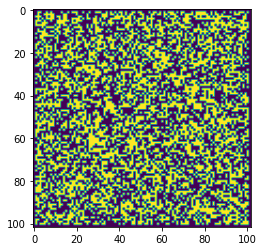

In [200]:
plt.imshow(image)

In [201]:
enhanced.sum()
# 5326

5786.0

In [202]:
puzzle.answer_a = int(enhanced.sum())

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


In [203]:
# Part B

In [207]:
%%time
algo, image = parse(data)
image = np.pad(image, 1).T
enhanced = image.copy()

for i in range(50):
    enhanced = generic_filter(
        enhanced, 
        enhance, 
        size=3, 
        extra_keywords={'algo':algo}, 
        mode='constant', 
        cval=(i)%2
    )
    enhanced = np.pad(enhanced, 1, constant_values=(i+1)%2)

CPU times: user 18.3 s, sys: 21 ms, total: 18.4 s
Wall time: 18.3 s


In [208]:
enhanced.sum()

16757.0

In [206]:
puzzle.answer_b = int(enhanced.sum())

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 20! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].
